In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:

from keras.datasets import mnist

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [3]:
from tensorflow import keras
from keras.datasets import mnist
from keras import utils as np_utils

# Setup train and test splits
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
# print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

# This is the one-hot version of: [5, 0, 4, 1, 9]
"""
[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
"""

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


'\n[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]\n [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]\n [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]\n [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]\n'

In [5]:
import matplotlib.pyplot as plt 
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model1 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model1.add(Dense(units=4, activation='sigmoid', input_shape=(image_size,)))
model1.add(Dense(units=num_classes, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


In [6]:
model2 = Sequential()
model2.add(Dense(units=8, activation='sigmoid', input_shape=(image_size,)))
model2.add(Dense(units=num_classes, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [7]:
model3 = Sequential()
model3.add(Dense(units=12, activation='sigmoid', input_shape=(image_size,)))
model3.add(Dense(units=num_classes, activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                9420      
                                                                 
 dense_5 (Dense)             (None, 10)                130       
                                                                 
Total params: 9,550
Trainable params: 9,550
Non-trainable params: 0
_________________________________________________________________


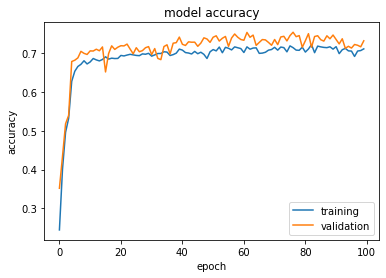

Test loss: 0.908
Test accuracy: 0.706


In [8]:
model1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=["acc"])
history = model1.fit(x_train, y_train, batch_size=128, epochs=100, verbose=False, validation_split=.1)
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

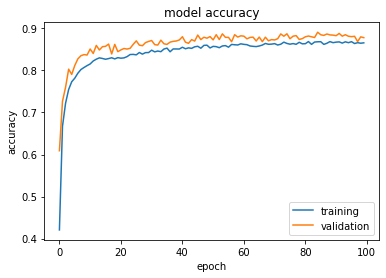

Test loss: 0.483
Test accuracy: 0.863


In [9]:
model2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=["acc"])
history = model2.fit(x_train, y_train, batch_size=128, epochs=100, verbose=False, validation_split=.1)
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

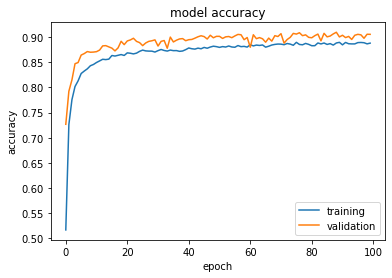

Test loss: 0.377
Test accuracy: 0.888


In [10]:
model3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=["acc"])
history = model3.fit(x_train, y_train, batch_size=128, epochs=100, verbose=False, validation_split=.1)
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [13]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]

In [14]:
first_layer_weights

array([[ 0.0406498 ,  0.06202951,  0.07569076, -0.05195146],
       [ 0.03597565, -0.04143981,  0.04686722, -0.025579  ],
       [ 0.03188332, -0.04936153, -0.04878293, -0.03799445],
       ...,
       [-0.01952878, -0.08554541, -0.01235197, -0.07476199],
       [-0.03769635, -0.03408121, -0.06195894,  0.03213751],
       [ 0.03394064,  0.04646489,  0.08547135, -0.00208917]],
      dtype=float32)

In [16]:
second_layer_weights 

array([[ 2.43373   , -3.1915195 , -2.0872712 ,  2.2642412 , -1.9408127 ,
         2.4193842 , -3.0732656 ,  1.0825582 ,  2.1171653 ,  1.7216059 ],
       [-2.2368076 ,  4.1285    ,  0.9033752 ,  3.0643916 , -0.6490174 ,
        -1.6174098 , -2.5758784 ,  2.96484   , -0.9269831 , -0.36035854],
       [ 3.7212486 , -2.354737  ,  3.2621207 , -0.76039124,  0.6762028 ,
        -1.5497887 , -1.1876265 , -1.046957  , -1.7076459 ,  0.8325477 ],
       [-1.8763522 , -1.7496991 , -1.2329942 , -2.4130511 ,  4.6644573 ,
        -1.8438506 , -1.6954799 ,  3.6689243 , -1.8910177 ,  4.0819707 ]],
      dtype=float32)

In [6]:
# in depth layers

def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


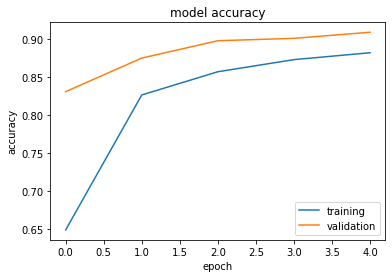


Test loss: 0.479
Test accuracy: 0.894
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


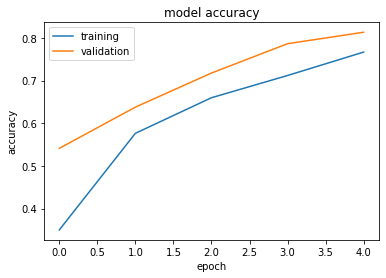


Test loss: 1.17
Test accuracy: 0.795
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


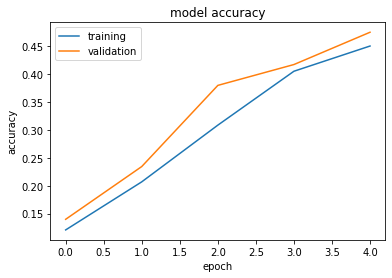


Test loss: 2.1
Test accuracy: 0.465
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


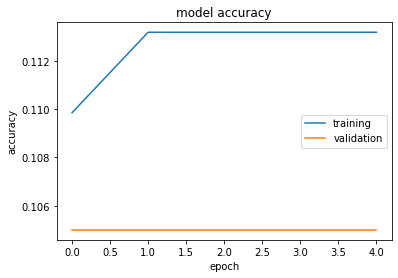


Test loss: 2.29
Test accuracy: 0.113


In [7]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)